In [105]:
# importing libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from yellowbrick.regressor import ResidualsPlot
from sklearn.decomposition import PCA

In [107]:
# reading dataset into python environment

In [108]:
garment_dataset = pd.read_csv("garments_worker_productivity.csv",sep =",")
garment_dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [109]:
garment_dataset.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [110]:
# filling missing values with the median

In [111]:
garment_dataset_ = garment_dataset.fillna(garment_dataset['wip'].median(), inplace = True)

In [112]:
# renaming columns for better analysis

In [113]:
# renamed_g_dataset_.rename(columns = {'smv':'standard minute value','wip':'work in progress'})

In [114]:
# checking for outliers

In [115]:
garment_dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1126.437761,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1397.653191,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [116]:
# cleaning data by fixing spelling 

In [117]:
lst = []
for change in range(len(garment_dataset['department'])):
    if garment_dataset['department'][change] == 'sweing':
        lst.append("sewing")
    elif garment_dataset['department'][change] == 'finishing ':
        lst.append('finishing')
    else:
        lst.append(garment_dataset['department'][change])
garment_dataset['department'] = lst

In [118]:
garment_dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


In [119]:
# bar plot showing teams and their corresponding targeted productivity

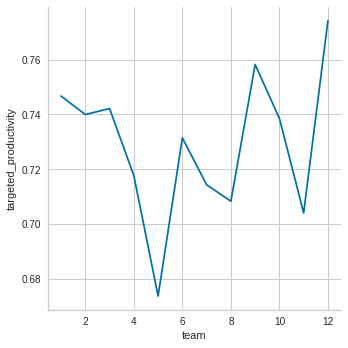

In [120]:
sns.relplot(x="team", y="targeted_productivity", kind="line", ci = None, data=garment_dataset);

In [121]:
# bar plot showing teams and their corresponding actual productivity

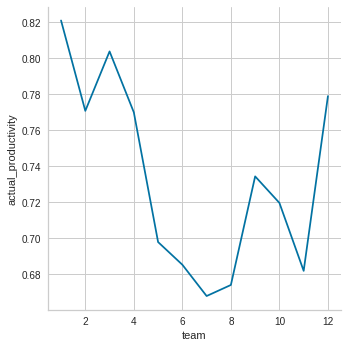

In [122]:
sns.relplot(x="team", y="actual_productivity", kind="line", ci=None,data=garment_dataset);

In [123]:
# bar chart showing each team and their corresponding targeted productivity

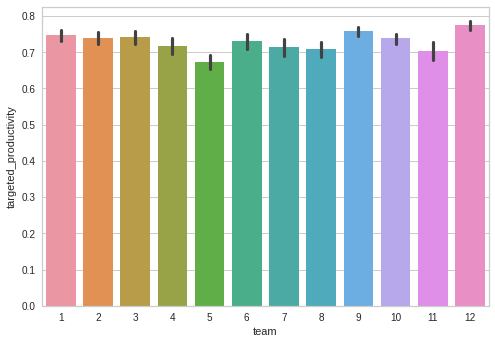

In [124]:
ax = sns.barplot(x="team", y="targeted_productivity", data=garment_dataset)

In [125]:
# bar chart showing each team and their corresponding actual productivity

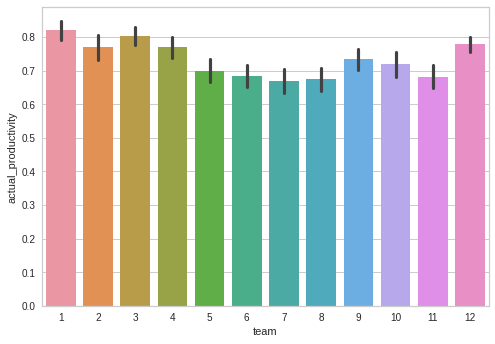

In [126]:
ax = sns.barplot(x="team", y="actual_productivity", data=garment_dataset)

In [127]:
# bar plot showing how idle time affects the employee's targeted productivity

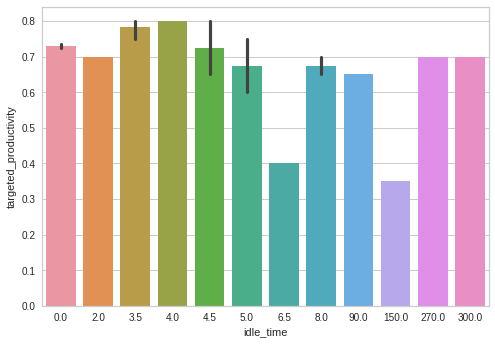

In [128]:
ax = sns.barplot(x="idle_time", y="targeted_productivity", data=garment_dataset)

In [129]:
# bar plot showing how idle time affects the employees' actual productivity

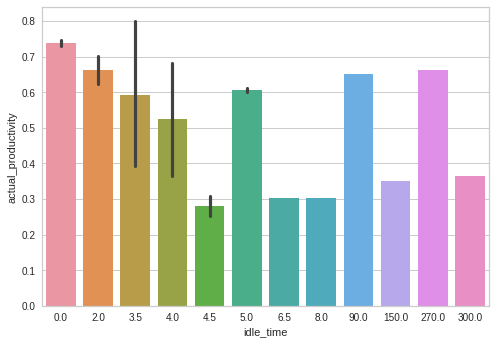

In [130]:
ax = sns.barplot(x="idle_time", y="actual_productivity", data=garment_dataset)

In [131]:
# This is a bar plot showing each team's actual productivity for each quarter of the month.

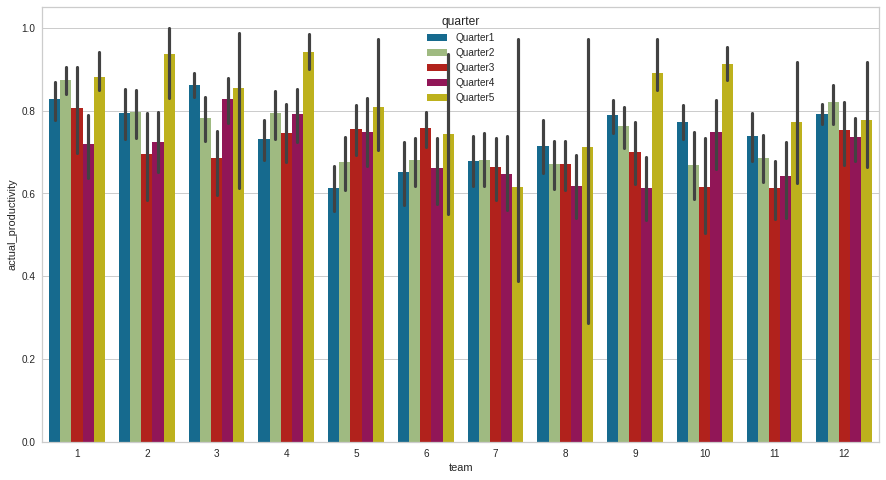

In [132]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="team", y="actual_productivity", hue="quarter", data=garment_dataset)

In [133]:
garment_dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1126.437761,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1397.653191,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [134]:
# sns.boxplot(x="actual_productivity",data=renamed_g_dataset)

In [135]:
# Q1 = renamed_g_dataset['targeted_productivity'].quantisns.boxplot(x="actual_productivity",data=renamed_g_dataset)le(.50)
# Q3 = renamed_g_dataset['targeted_productivity'].quantile(.75)
# Q2 = renamed_g_dataset['targeted_productivity'].quantile(.25)

# IQR = Q3 - Q1

# upper = Q3 - 1.5*IQR
# lower = Q1 - 1.5*IQR

# print(upper, lower)

In [136]:
# fixing the outliers by filling with the median where necessary.

In [137]:
garment_dataset['targeted_productivity'] = np.where(garment_dataset['targeted_productivity'] > 0.800000, 0.750000, garment_dataset['targeted_productivity'])
garment_dataset['wip'] = np.where(garment_dataset['wip'] < 970.000000, 1039.000000, garment_dataset['wip'])
garment_dataset['over_time'] = np.where(garment_dataset['over_time'] < 1440.000000, 3960.000000, garment_dataset['over_time'])

In [138]:
# dropping unnecessary columns for this analysis

In [139]:
my_g_dataset=garment_dataset.drop(columns=['date', 'quarter', 'department', 'day','idle_men','no_of_workers','idle_time','no_of_style_change'])

In [140]:
# splitting my variables into dependent and independent variables 

In [141]:
y = my_g_dataset['actual_productivity']
x = my_g_dataset.drop(columns = ['actual_productivity'])


In [142]:
# using the variance inflation factor to check for multicollinearity

In [143]:
def calcu_mult(df):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return vif

In [144]:
calcu_mult(my_g_dataset)

,variables,VIF
0,team,4.265370
1,targeted_productivity,7.997377
2,smv,4.819813
3,wip,1.800480
4,over_time,7.090233
5,incentive,1.062476


In [145]:
# Using heatmap to check for relationship between dependent and independent variables

<AxesSubplot:>

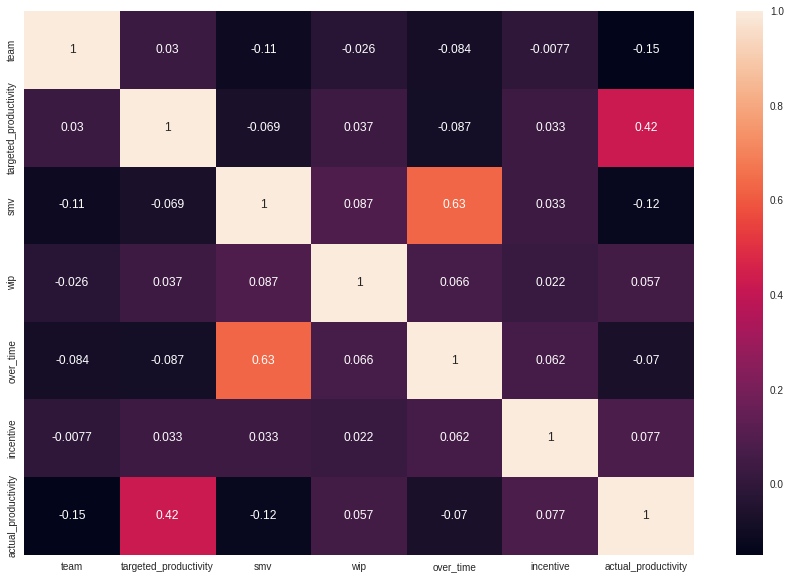

In [146]:
plt.figure(figsize=(15,10))
sns.heatmap(my_g_dataset.corr(), annot=True)

In [147]:
# splitting dataset into train and test

In [148]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)

In [149]:
# normalizing dataset to avoid bias.

In [150]:
normalizer = MinMaxScaler()
norm_X = pd.DataFrame(normalizer.fit_transform(X_train))

In [151]:
# splitting the normalized dataset to enable validation 

In [152]:
X_train_, X_val_test, y_train_, y_val_test = train_test_split(norm_X, y_train, test_size=0.25, random_state=1)

In [153]:
# using the random forest regressor model to show the most important features 

In [154]:
model = RandomForestRegressor(random_state=1, max_depth=4)
model.fit(X_train_, y_train_)

RandomForestRegressor(max_depth=4, random_state=1)

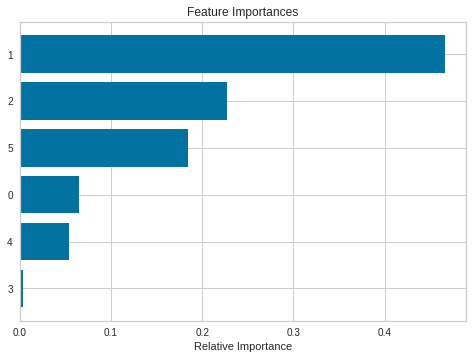

In [155]:
features = norm_X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [156]:
# using the principle component analysis model to also display the most important features

In [157]:
pca = PCA(n_components = 6)
pca_model = pca.fit(X_train_)
PCA(n_components = 6)
print(pca_model.explained_variance_ratio_)
print(pca_model.singular_values_)

[0.56117373 0.27589141 0.09221658 0.03882036 0.02781325 0.00408468]
[8.61986327 6.04394913 3.49426794 2.26715644 1.91901141 0.73541159]


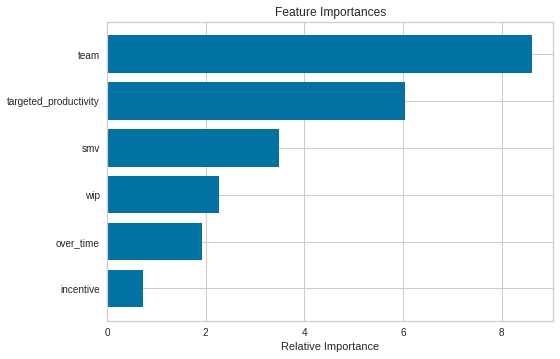

In [158]:
features = my_g_dataset.columns
importances = pca_model.singular_values_
indices = np.argsort(importances)[-8:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

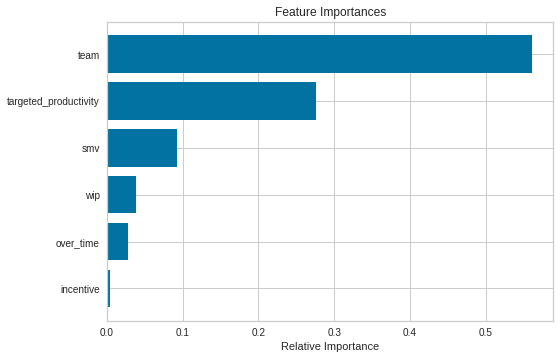

In [159]:
features = my_g_dataset.columns
importances = pca_model.explained_variance_ratio_
indices = np.argsort(importances)[-8:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [160]:
# fitting normalized data into the Linear Regression model

In [161]:
ln_model = LinearRegression()
ln_result = ln_model.fit(X_train_, y_train_)

In [162]:
# getting the r squared score

In [163]:
coef_deter = ln_result.score(X_train_, y_train_)
coef_deter

0.2569844422055254

In [164]:
# getting the adjusted r squared score

In [165]:
1 - (1-ln_result.score(X_train_,y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.2507054374917693

In [166]:
# getting the intercept

In [167]:
intercept = ln_result.coef_
intercept

array([-0.0988869 ,  0.57649929, -0.12686043,  0.11998306,  0.03721733,
        0.40207798])

In [168]:
# predicting the output using the normalized test

In [169]:
y_predict = ln_result.predict(X_val_test)


In [170]:
# checking for the errors 

In [171]:
print("MAE : ",mean_absolute_error(y_val_test, y_predict))
print("MSE : ",mean_squared_error(y_val_test, y_predict))
print("R2 score : ",r2_score(y_val_test, y_predict))

MAE :  0.11618341587614815
MSE :  0.027941725584227962
R2 score :  0.1031966555033128


In [172]:
# plotting histogram to show model performance

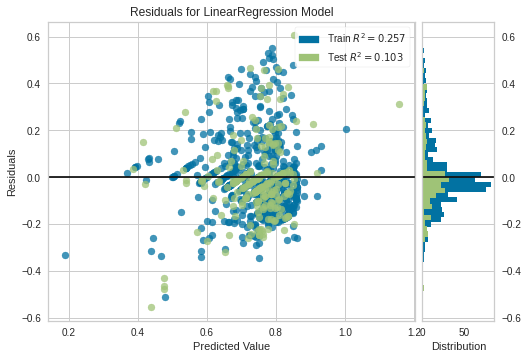

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [173]:
model_ = LinearRegression()
visualizer = ResidualsPlot(model_, hist=True, qqplot=False)

visualizer.fit(X_train_, y_train_)  
visualizer.score(X_val_test, y_val_test)  
visualizer.show()